Please uncomment the first cell to install Yellowbrick package (more about it in the report). !WARNING! C:/ drive must be given all permissions.

In [2]:
#pip install yellowbrick --user

Part of the script responsible for creating the plots showcasing the Silhouette Score has been pulled from : https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#Perform_Comparative_Analysis_to_Determine_Best_value_of_K_using_Silhouette_Plot

In [3]:
import numpy as np
import pandas as pd
import os
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'whitegrid' ,font_scale = 1.5, color_codes=True)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
vgg = h5py.File('vgg16_dim_reduced_feature.h5', mode='r')
list(vgg.keys())

['file_name', 'pca_feature', 'umap_feature']

In [5]:
dataset_fname=vgg['file_name']
dataset_pca=vgg['pca_feature']
dataset_umap=vgg['umap_feature']

In [6]:
ground_truth=dataset_fname[:]

In [7]:
range_n_clusters=np.arange(2,12)

In [8]:
X_pca = dataset_pca[:]

Silhouette Score is 0.10805415362119675 when number of clusters are 2
V Measure Score is 0.1473402211189285 when number of clusters are 2
Silhouette Score is 0.14403125643730164 when number of clusters are 3
V Measure Score is 0.2084133773603703 when number of clusters are 3
Silhouette Score is 0.12430509179830551 when number of clusters are 4
V Measure Score is 0.2547756494680595 when number of clusters are 4
Silhouette Score is 0.14151237905025482 when number of clusters are 5
V Measure Score is 0.3084076266798245 when number of clusters are 5
Silhouette Score is 0.13334040343761444 when number of clusters are 6
V Measure Score is 0.3377414450066962 when number of clusters are 6
Silhouette Score is 0.129567950963974 when number of clusters are 7
V Measure Score is 0.3679090365649077 when number of clusters are 7
Silhouette Score is 0.13325318694114685 when number of clusters are 8
V Measure Score is 0.387182131552393 when number of clusters are 8
Silhouette Score is 0.128871634602546

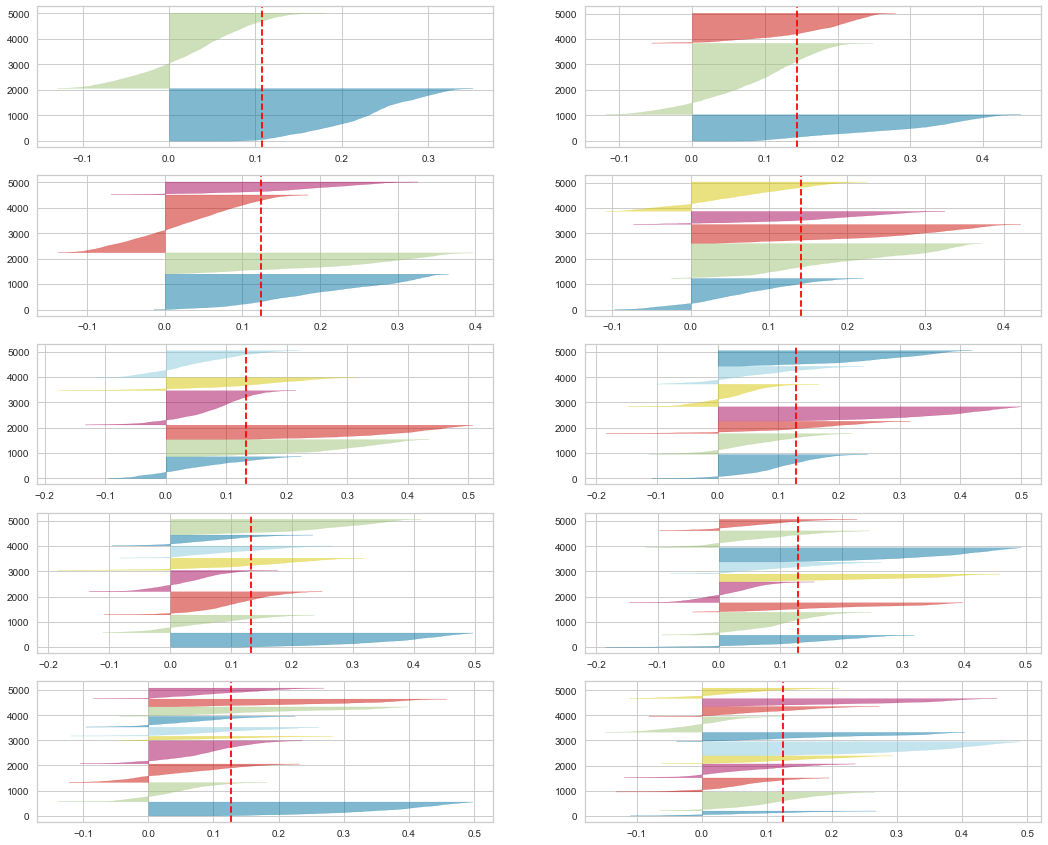

In [11]:
fig, ax = plt.subplots(5, 2, figsize=(18,15))
for n_clusters in range_n_clusters:
    kmeans_pca = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_pca.fit_predict(X_pca)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [12]:
kmeans_pca = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

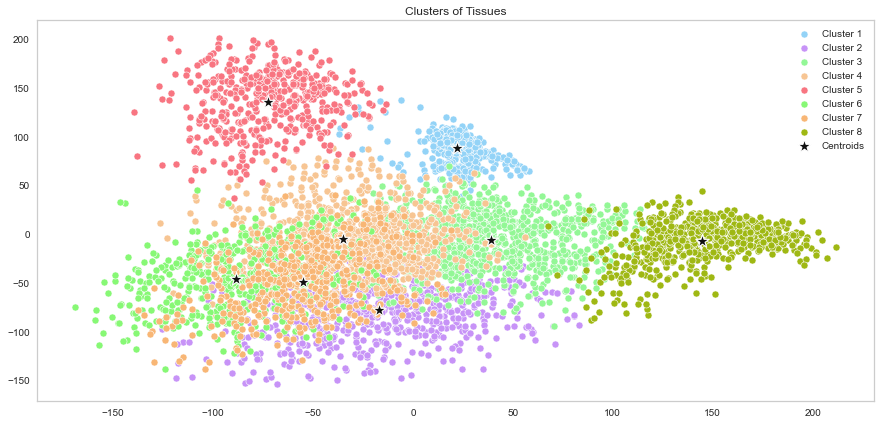

In [13]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 3, 0], X_pca[y_kmeans_pca == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 4, 0], X_pca[y_kmeans_pca == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 5, 0], X_pca[y_kmeans_pca == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 6, 0], X_pca[y_kmeans_pca == 6, 1], color = '#f8b675', label = 'Cluster 7',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 7, 0], X_pca[y_kmeans_pca == 7, 1], color = '#9fb813', label = 'Cluster 8',s=50)
sns.scatterplot(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()

In [14]:
X_umap = dataset_umap[:]

Silhouette Score is 0.135068878531456 when number of clusters are 2
V Measure Score is 0.11577660348173359 when number of clusters are 2
Silhouette Score is 0.14170730113983154 when number of clusters are 3
V Measure Score is 0.17730538078176664 when number of clusters are 3
Silhouette Score is 0.11645016819238663 when number of clusters are 4
V Measure Score is 0.20619192799185349 when number of clusters are 4
Silhouette Score is 0.12467776983976364 when number of clusters are 5
V Measure Score is 0.29031352402722815 when number of clusters are 5
Silhouette Score is 0.09427247196435928 when number of clusters are 6
V Measure Score is 0.30118410008746854 when number of clusters are 6
Silhouette Score is 0.09284745901823044 when number of clusters are 7
V Measure Score is 0.34410415353286444 when number of clusters are 7
Silhouette Score is 0.08271777629852295 when number of clusters are 8
V Measure Score is 0.3496925703385414 when number of clusters are 8
Silhouette Score is 0.07626368

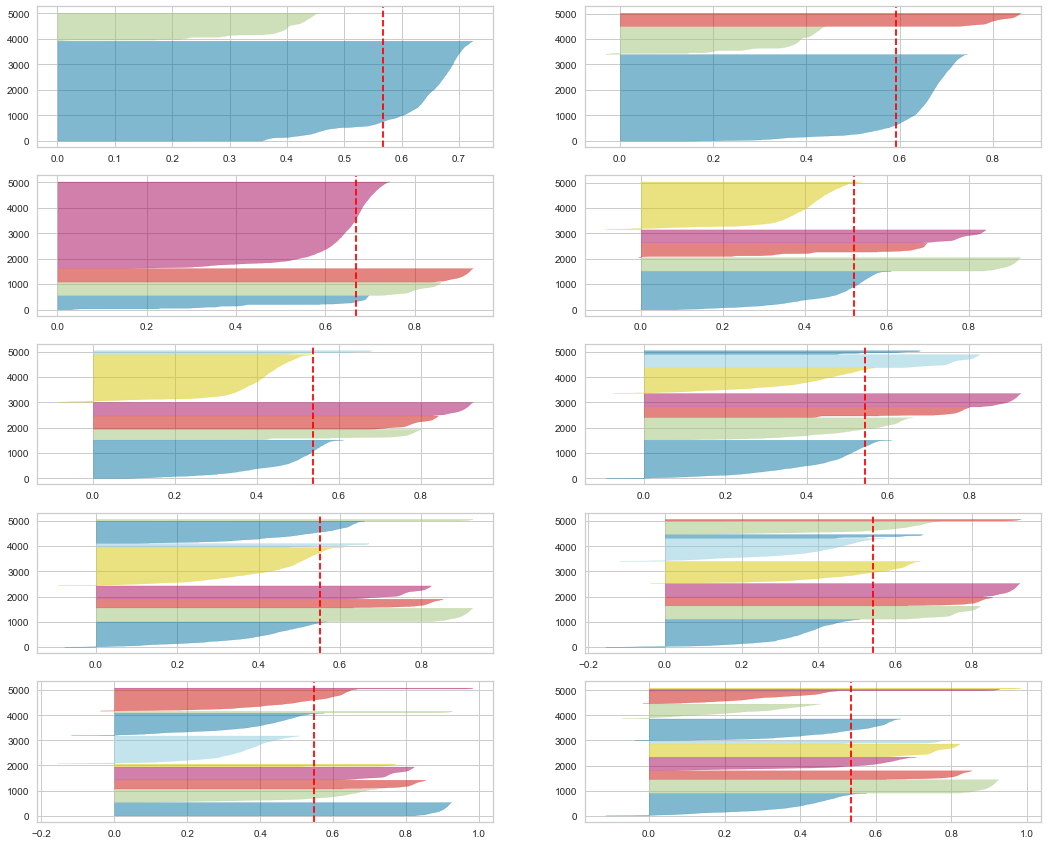

In [15]:
fig, ax = plt.subplots(5, 2, figsize=(18,15))
for n_clusters in range_n_clusters:
    kmeans_umap = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_umap.fit_predict(X_umap)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_umap, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_umap)

In [16]:
kmeans_umap = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans_umap = kmeans_umap.fit_predict(X_umap)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

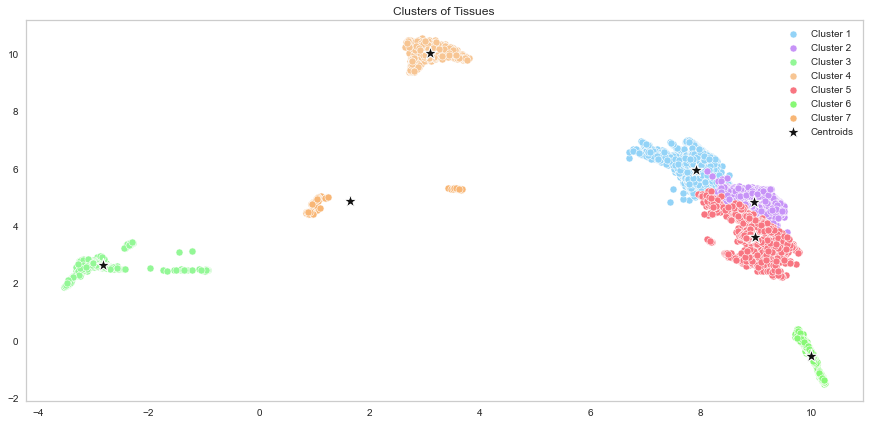

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_umap[y_kmeans_umap == 0, 0], X_umap[y_kmeans_umap == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 1, 0], X_umap[y_kmeans_umap == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 2, 0], X_umap[y_kmeans_umap == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 3, 0], X_umap[y_kmeans_umap == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 4, 0], X_umap[y_kmeans_umap == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 5, 0], X_umap[y_kmeans_umap == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 6, 0], X_umap[y_kmeans_umap == 6, 1], color = '#f8b675', label = 'Cluster 7',s=50)
sns.scatterplot(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()